In [2]:
import pandas as pd

results_path = "evaluation_metrics.csv"  # Update with actual path
df = pd.read_csv(results_path)

In [7]:
df.head(20)

,Query,Collection,Search Type,Avg Source Match,Avg Question Type Match,Avg First Match,Avg NMCC
0,How has Apple's total net sales changed over t...,TextChunk,bm25,1.000000,1.0,1.0,0.0
1,How has Apple's total net sales changed over t...,TextChunk,vector,1.000000,1.0,1.0,0.0
2,How has Apple's total net sales changed over t...,TextChunk,hybrid,1.000000,1.0,1.0,0.0
3,How has Apple's total net sales changed over t...,ContextChunk,bm25,0.666667,1.0,1.0,0.0
4,How has Apple's total net sales changed over t...,ContextChunk,vector,1.000000,1.0,1.0,0.0
5,How has Apple's total net sales changed over t...,ContextChunk,hybrid,1.000000,1.0,1.0,0.0
6,How has Apple's total net sales changed over t...,TextContextChunk,bm25,1.000000,1.0,1.0,0.0
7,How has Apple's total net sales changed over t...,TextContextChunk,vector,1.000000,1.0,1.0,0.0
8,How has Apple's total net sales changed over t...,TextContextChunk,hybrid,1.000000,1.0,1.0,0.0
9,What are the major factors contributing to the...,TextChunk,bm25,1.000000,1.0,1.0,0.0


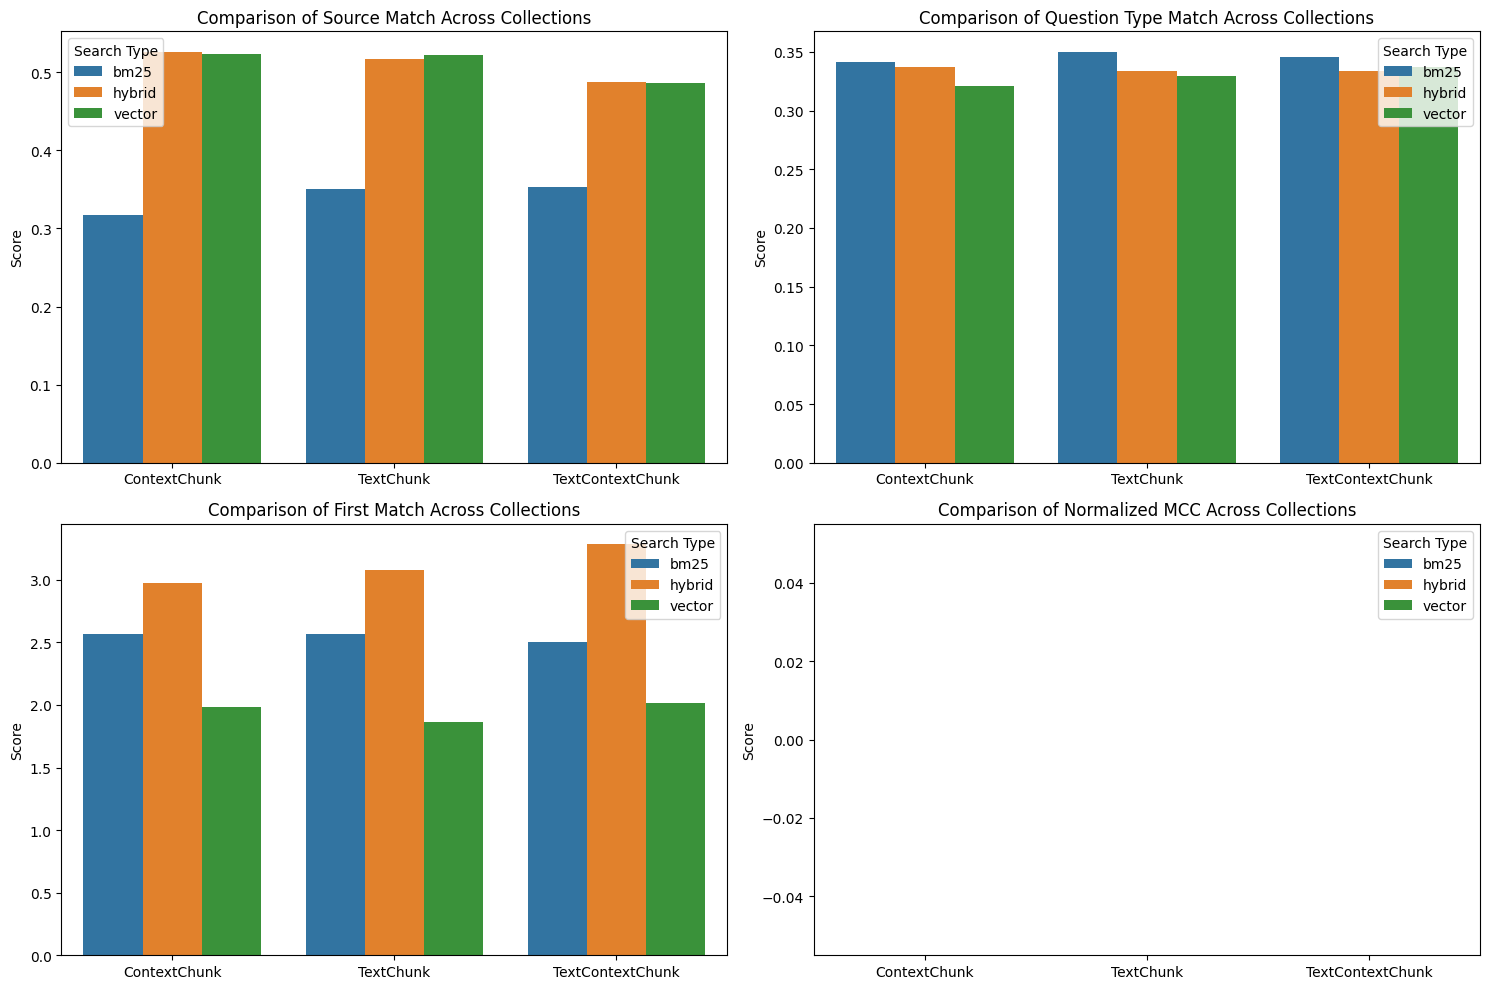

In [10]:
import seaborn as sns
# Group data by Collection and Search Type, computing mean scores
performance_summary = df.groupby(["Collection", "Search Type"]).mean(numeric_only=True).reset_index()

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics = ["Avg Source Match", "Avg Question Type Match", "Avg First Match", "Avg NMCC"]
titles = ["Source Match", "Question Type Match", "First Match", "Normalized MCC"]

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    sns.barplot(x="Collection", y=metric, hue="Search Type", data=performance_summary, ax=ax)
    ax.set_title(f"Comparison of {titles[i]} Across Collections")
    ax.set_ylabel("Score")
    ax.set_xlabel("")
    ax.legend(title="Search Type")

plt.tight_layout()
plt.show()